In [2]:
import numpy as np #Linear algebra
import pandas as pd #allows data manipulations and matrices
#pip install mysql-connector-python # Connector used to import data from mysql to python, must be used in command promt

In [3]:
# Using a MySQL connecter to directly query the database and pull in the data we need.

import mysql.connector # SQL connecter
# Establish the connection
connection = mysql.connector.connect(
    host='localhost',          
    user='root',      
    password='root15',  
    database='used_car'   
)

# Create a cursor object
cursor = connection.cursor()

# Write your query
query = "SELECT * FROM used_car.audi;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
audi = pd.DataFrame(result, columns=column_names)

# Close the cursor and connection
cursor.close()
connection.close()

# Print the DataFrame
print(audi)


      model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10560    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10561    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10562    A3  2020  17199       Manual      609   Petrol  150  49.6   
10563    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10564    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  make  
0             1.4  audi  
1             2.0  audi  
2             1.4  audi  
3             2.0  audi  
4             1.0  audi  
...

In [4]:
# Repeating for all data we want to collect

# Establish the connection
connection = mysql.connector.connect(
    host='localhost',        
    user='root',     
    password='root15', 
    database='used_car'
)

# Create a cursor object
cursor = connection.cursor()

# Write your query
query = "SELECT * FROM used_car.bmw;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
bmw = pd.DataFrame(result, columns=column_names)

# Close the cursor and connection
cursor.close()
connection.close()

# Print the DataFrame
print(audi)
print(bmw)


      model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10560    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10561    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10562    A3  2020  17199       Manual      609   Petrol  150  49.6   
10563    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10564    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  make  
0             1.4  audi  
1             2.0  audi  
2             1.4  audi  
3             2.0  audi  
4             1.0  audi  
...

In [5]:
# Establish the connection
connection = mysql.connector.connect(
    host='localhost',        
    user='root',  
    password='root15',  
    database='used_car'   
)

# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.ford;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
ford = pd.DataFrame(result, columns=column_names)

#Print data
print(ford)

         model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17806   Fiesta  2016   7999       Manual    31348   Petrol  125  54.3   
17807    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17808    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17809    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17810       KA  2018   8299       Manual     5007   Petrol  145  57.7   

       engineSize  make  
0             1.0  ford  
1             1.0  ford  
2             1.0  ford  
3             1.5  

In [6]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.hyundi;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
hyundi = pd.DataFrame(result, columns=column_names)

#Print data
print(hyundi)

        model  year  price transmission  mileage fuelType  tax(Â£)   mpg  \
0         I20  2017   7999       Manual    17307   Petrol      145  58.9   
1      Tucson  2016  14499    Automatic    25233   Diesel      235  43.5   
2      Tucson  2016  11399       Manual    37877   Diesel       30  61.7   
3         I10  2016   6499       Manual    23789   Petrol       20  60.1   
4        IX35  2015  10199       Manual    33177   Diesel      160  51.4   
...       ...   ...    ...          ...      ...      ...      ...   ...   
4769      I30  2016   8680       Manual    25906   Diesel        0  78.4   
4770      I40  2015   7830       Manual    59508   Diesel       30  65.7   
4771      I10  2017   6830       Manual    13810   Petrol       20  60.1   
4772   Tucson  2018  13994       Manual    23313   Petrol      145  44.8   
4773   Tucson  2016  15999    Automatic    11472   Diesel      125  57.6   

      engineSize    make  
0            1.2  hyundi  
1            2.0  hyundi  
2     

In [7]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.merc;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
merc = pd.DataFrame(result, columns=column_names)

#Print data
print(merc)

            model  year  price transmission  mileage fuelType  tax   mpg  \
0             SLK  2005   5200    Automatic    63000   Petrol  325  32.1   
1         S Class  2017  34948    Automatic    27000   Hybrid   20  61.4   
2        SL CLASS  2016  49948    Automatic     6200   Petrol  555  28.0   
3         G Class  2016  61948    Automatic    16000   Petrol  325  30.4   
4         G Class  2016  73948    Automatic     4000   Petrol  325  30.1   
...           ...   ...    ...          ...      ...      ...  ...   ...   
12855     C Class  2020  35999    Automatic      500   Diesel  145  55.4   
12856     B Class  2020  24699    Automatic     2500   Diesel  145  55.4   
12857   GLC Class  2019  30999    Automatic    11612   Diesel  145  41.5   
12858   CLS Class  2019  37990    Automatic     2426   Diesel  145  45.6   
12859     S Class  2019  54999    Automatic     2075   Diesel  145  52.3   

       engineSize  make  
0             1.8  merc  
1             2.1  merc  
2        

In [8]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.skoda;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
skoda = pd.DataFrame(result, columns=column_names)

#Print data
print(skoda)

              model  year  price transmission  mileage fuelType  tax   mpg  \
0           Octavia  2017  10550       Manual    25250   Petrol  150  54.3   
1            Citigo  2018   8200       Manual     1264   Petrol  145  67.3   
2           Octavia  2019  15650    Automatic     6825   Diesel  145  67.3   
3      Yeti Outdoor  2015  14000    Automatic    28431   Diesel  165  51.4   
4            Superb  2019  18350       Manual    10912   Petrol  150  40.9   
...             ...   ...    ...          ...      ...      ...  ...   ...   
6183           Yeti  2014  11440    Semi-Auto    14569   Petrol  160  44.8   
6184        Octavia  2014  10990    Semi-Auto    49999   Petrol   30  56.5   
6185          Fabia  2017   9500    Semi-Auto    17131   Petrol  145  61.4   
6186         Citigo  2016   5999       Manual    21747   Petrol   20  62.8   
6187          Fabia  2017   9232    Semi-Auto    42530   Petrol   20  60.1   

      engineSize   make  
0            1.4  skoda  
1          

In [9]:
# Establish the connection
connection = mysql.connector.connect(
    host='localhost',          
    user='root',      
    password='root15',  
    database='used_car'   
)

# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.all_used;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
all_used = pd.DataFrame(result, columns=column_names)

#Print data
print(all_used)

          model  year  price transmission  mileage fuelType  tax   mpg  \
0            A1  2017  12500       Manual    15735   Petrol  150  55.4   
1            A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2            A1  2016  11000       Manual    29946   Petrol   30  55.4   
3            A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4            A3  2019  17300       Manual     1998   Petrol  145  49.6   
...         ...   ...    ...          ...      ...      ...  ...   ...   
62857      Yeti  2014  11440    Semi-Auto    14569   Petrol  160  44.8   
62858   Octavia  2014  10990    Semi-Auto    49999   Petrol   30  56.5   
62859     Fabia  2017   9500    Semi-Auto    17131   Petrol  145  61.4   
62860    Citigo  2016   5999       Manual    21747   Petrol   20  62.8   
62861     Fabia  2017   9232    Semi-Auto    42530   Petrol   20  60.1   

       engineSize   make  
0             1.4   audi  
1             2.0   audi  
2             1.4   audi  
3  

In [10]:
all_used

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
62857,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2,skoda
62858,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4,skoda
62859,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0,skoda
62860,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0,skoda


In [11]:
## Creating our initial general model for prediciting car prices based on the mileage, year and tax.
## The goal is to create a accurate general model that will work on all cars. This may not be feasible or optimal so individual models based on the brand will be constructed later.

# Import the ols function
from  statsmodels.formula.api  import ols
# Create the model object
car_price = ols('price ~ year + mileage + tax', data=all_used)
# Fit the model
car_price = car_price.fit()

# Print the parameters of the fitted model
print(car_price.params)

Intercept   -3.935399e+06
year         1.958387e+03
mileage     -5.189452e-02
tax          4.013744e+01
dtype: float64


In [12]:
# Reports summary information of the model so we can diagnose whether the model is accurate and/or fitting.
print(car_price.summary())
# Findings:
#-The model is significant and so are its chosen explanatory variables. 
#- Low R^2 value indicates explanetory variables chosen do not fully explain variation in car price
# Durbin-Watson test suggests positive autocorrelation 
# The Note at the bottom of the summary is suggesting multicolinearity 



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9571.
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        11:22:42   Log-Likelihood:            -6.6109e+05
No. Observations:               62862   AIC:                         1.322e+06
Df Residuals:                   62858   BIC:                         1.322e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.935e+06   5.04e+04    -78.132      0.0

In [16]:
## Lets address multicolinearity by calculating VIF (variance inflation factor)
import statsmodels.api as sm #Stats models 
from statsmodels.stats.outliers_influence import variance_inflation_factor # Used to calculate VIF
X = all_used[["year","mileage","tax"]]
X = sm.add_constant(X)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# Calculate VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Convert VIF to normal number format by rounding
vif_data["VIF"] = vif_data["VIF"].round(2)
print(vif_data)
## The result here suggests that the data doesnt have any multicolinearity 

   feature         VIF
0    const  1997765.40
1     year        2.23
2  mileage        2.27
3      tax        1.04


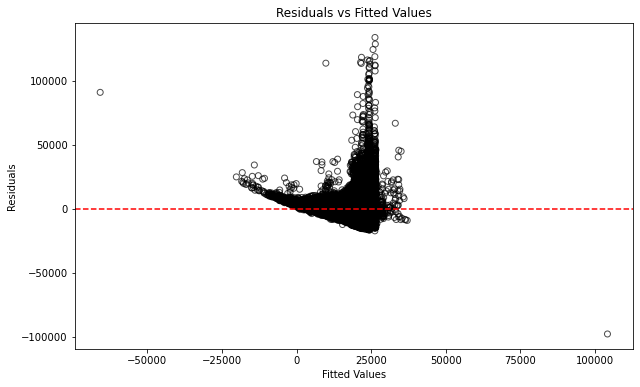

In [17]:
#Lets look at the distribution of residuals and figure out if we have heteroskedasticity

fitted_vals = car_price.fittedvalues
residuals = car_price.resid

# Ploting residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals, edgecolor='k', facecolor='none', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

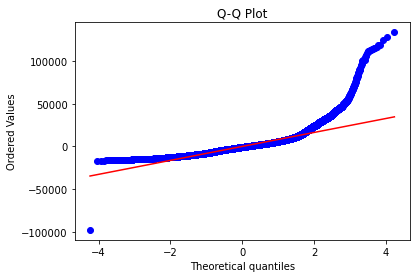

In [22]:
import scipy.stats as stats 

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.show()

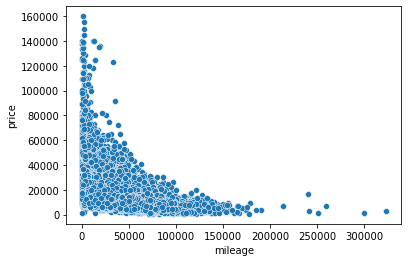

In [14]:
# Here we will create a visualisation for mileage against price
import seaborn as sns # import seaborn for visualisations 
import matplotlib.pyplot as plt #matplotlib for visualisations 

sns.scatterplot(data=all_used, x='mileage', y='price')
plt.show()



In [15]:
# Lets create a visualisation of tax and price and add a line of best fit
sns.scatterplot(data=all_used, x='ta x', y='price')
sns.regplot(data=all_used, x='tax', y='price', scatter=False, color='red')
plt.show()
# This creates a plot that 


ValueError: Could not interpret value `ta x` for parameter `x`

In [ ]:
sns.scatterplot(data=all_used, x='tax', y='year')
plt.show()

In [ ]:
sns.barplot(data=all_used, x='fuelType', y='tax')
plt.show()

In [ ]:
tax_grouped = all_used.groupby('fuelType')['tax'].agg(['mean', 'median', 'max', 'min'])
tax_grouped['range'] = tax_grouped['max'] - tax_grouped['min']
print(tax_grouped)